<a href="https://colab.research.google.com/github/samaya1712/CIENCIA-DE-DATOS/blob/main/Analisis_EDA_Analisis_exploratorio_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AGENDA
##1. Intro
##2. Analisis inicial de datos
##3. Inspeccion de datos y limpieza
##4. analisis grafico EDA
##5. Conclusiones

##QUE ES EDA?
Son varias tecnicas que permiten analizar e investigar los datos e identificar sus caracteristicas principales de un dataset. Su principal ventaja es proveer visualizacion de datos despues de la conduccion de un analisis.


##2. Analisis inicial de los datos

https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

Se realizara un analisis EDA usando Python para examinar el nivel de obesidad de un individuo en funcion a muchos factores como por ejemplo la edad, genero, estatura, consumo de alcohol, etc.

La obesidad es una de las principales preocupaciones de salud pública en el mundo. Según la OMS, más de 1.9 mil millones de adultos tenían sobrepeso en 2022, y de ellos, más de 650 millones eran obesos. Este aumento tiene graves repercusiones en la salud, ya que la obesidad está relacionada con enfermedades crónicas como la diabetes tipo 2, enfermedades cardiovasculares y ciertos tipos de cáncer. Se estima que el 80% de los casos de diabetes tipo 2 están vinculados a la obesidad.

El estudio de la obesidad también es crucial para entender sus determinantes sociales y ambientales. Factores como el acceso a alimentos saludables y espacios para hacer ejercicio influyen en su prevalencia. Comprender estas dinámicas puede ayudar a desarrollar políticas públicas efectivas que promuevan estilos de vida saludables.

Económicamente, la obesidad representa un gran costo. Se estima que los gastos relacionados con la obesidad superan los 1.3 billones de dólares anuales a nivel global. En EE. UU., los costos médicos para personas obesas son un 42% más altos que para quienes tienen un peso saludable, lo que ejerce presión sobre los sistemas de salud.

Además, la investigación sobre la obesidad ayuda a identificar tendencias en diferentes grupos demográficos, permitiendo intervenciones más efectivas. Algunas poblaciones, como las de bajos ingresos y ciertos grupos étnicos, presentan mayores tasas de obesidad, lo que requiere programas específicos y culturalmente relevantes.

Finalmente, el estudio de la obesidad fomenta la educación en salud, esencial para promover hábitos saludables y aumentar la actividad física. Campañas educativas han demostrado ser efectivas para reducir las tasas de obesidad.


###2.1 Informacion del dataset
Este dataset incluye los niveles de estimacion de obesidad en individuos del pais de Mexico, Peru y Colombia, basados en sus habitos alimenticios y condicion fisica.

##3. Inspeccion de datos y limpieza

El archivo contiene 17 variables y 2111 observaciones. Las variables son las siguientes:

Gender: Género de la persona (object).

Age: Edad de la persona (float64).

Height: Altura en metros (float64).

Weight: Peso en kilogramos (float64).

family_history_with_overweight: Indica si hay historia familiar de sobrepeso (object: "yes" o "no").

FAVC: Indica si la persona consume alimentos con alto contenido calórico con frecuencia (object: "yes" o "no").

FCVC: Frecuencia de consumo de vegetales (float64).

NCP: Número de comidas principales por día (float64).

CAEC: Frecuencia de consumo de alimentos entre comidas (object: valores como "Sometimes").

SMOKE: Indica si la persona fuma (object: "yes" o "no").

CH2O: Consumo de agua diario en litros (float64).

SCC: Indica si la persona monitorea su ingesta de calorías (object: "yes" o "no").

FAF: Frecuencia de actividad física en horas por semana (float64).

TUE: Tiempo usando dispositivos electrónicos en horas por día (float64).

CALC: Frecuencia de consumo de alcohol (object: valores como "no" o "Sometimes").

MTRANS: Modo de transporte principal (object: valores como "Public_Transportation", "Walking").

NObeyesdad: Nivel de obesidad según una clasificación (object: valores como "Normal_Weight", "Overweight_Level_I").

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix  # Changed this line to import the correct function
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv("/content/ObesityDataSet_raw_and_data_sinthetic.csv")
data.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
data.tail(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [6]:
data.sample(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
323,Male,18.000000,1.800000,72.000000,yes,yes,2.0,3.0,Sometimes,no,2.000000,no,3.000000,0.000000,Sometimes,Automobile,Normal_Weight
1403,Male,22.969366,1.701634,95.000000,yes,yes,2.0,3.0,Sometimes,no,2.133469,no,1.030199,1.082838,no,Public_Transportation,Obesity_Type_I
1988,Female,26.000000,1.594776,110.640929,yes,yes,3.0,3.0,Sometimes,no,2.639816,no,0.000000,0.452236,Sometimes,Public_Transportation,Obesity_Type_III
1543,Male,21.556361,1.773664,116.160329,yes,yes,2.0,3.0,Sometimes,no,2.000000,no,1.399183,1.000000,Sometimes,Public_Transportation,Obesity_Type_II
469,Female,19.000000,1.540000,42.000000,no,yes,3.0,1.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Insufficient_Weight


In [7]:
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [13]:
df = pd.DataFrame(data)
print(df)

      Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE  

In [15]:
numeric_data = data.select_dtypes(include=["number"])
media = numeric_data.mean()
maximo = numeric_data.max()
minimo = numeric_data.min()

print("Media:")
print(media)
print("\nMáximo:")
print(maximo)
print("\nMínimo:")
print(minimo)

Media:
Age       24.312600
Height     1.701677
Weight    86.586058
FCVC       2.419043
NCP        2.685628
CH2O       2.008011
FAF        1.010298
TUE        0.657866
dtype: float64

Máximo:
Age        61.00
Height      1.98
Weight    173.00
FCVC        3.00
NCP         4.00
CH2O        3.00
FAF         3.00
TUE         2.00
dtype: float64

Mínimo:
Age       14.00
Height     1.45
Weight    39.00
FCVC       1.00
NCP        1.00
CH2O       1.00
FAF        0.00
TUE        0.00
dtype: float64


In [16]:
#3.4 Valores perdidos
valores_perdidos=data.isnull().sum()
print("valores perdidos")
print(valores_perdidos)

valores perdidos
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [17]:
#3.6 Valores duplicados
duplicate_rows = data.duplicated()
num_duplicates = duplicate_rows.sum()
print("Número de filas duplicadas:", num_duplicates)

Número de filas duplicadas: 24


In [18]:
#Eliminando registros duplicados
data = data.drop_duplicates()
display(data)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [20]:
#3.7 Identificando de NaN
#Revisando si existen valores nan
print(data.isna())

      Gender    Age  Height  Weight  family_history_with_overweight   FAVC  \
0      False  False   False   False                           False  False   
1      False  False   False   False                           False  False   
2      False  False   False   False                           False  False   
3      False  False   False   False                           False  False   
4      False  False   False   False                           False  False   
...      ...    ...     ...     ...                             ...    ...   
2106   False  False   False   False                           False  False   
2107   False  False   False   False                           False  False   
2108   False  False   False   False                           False  False   
2109   False  False   False   False                           False  False   
2110   False  False   False   False                           False  False   

       FCVC    NCP   CAEC  SMOKE   CH2O    SCC    FAF    TUE   

In [21]:
#3.8 Identificacion de valores infinitos
data.isin([np.inf,-np.inf])
print(data)

      Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE  

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'FCVC'}>,
        <Axes: title={'center': 'NCP'}>,
        <Axes: title={'center': 'CH2O'}>],
       [<Axes: title={'center': 'FAF'}>, <Axes: title={'center': 'TUE'}>,
        <Axes: >]], dtype=object)

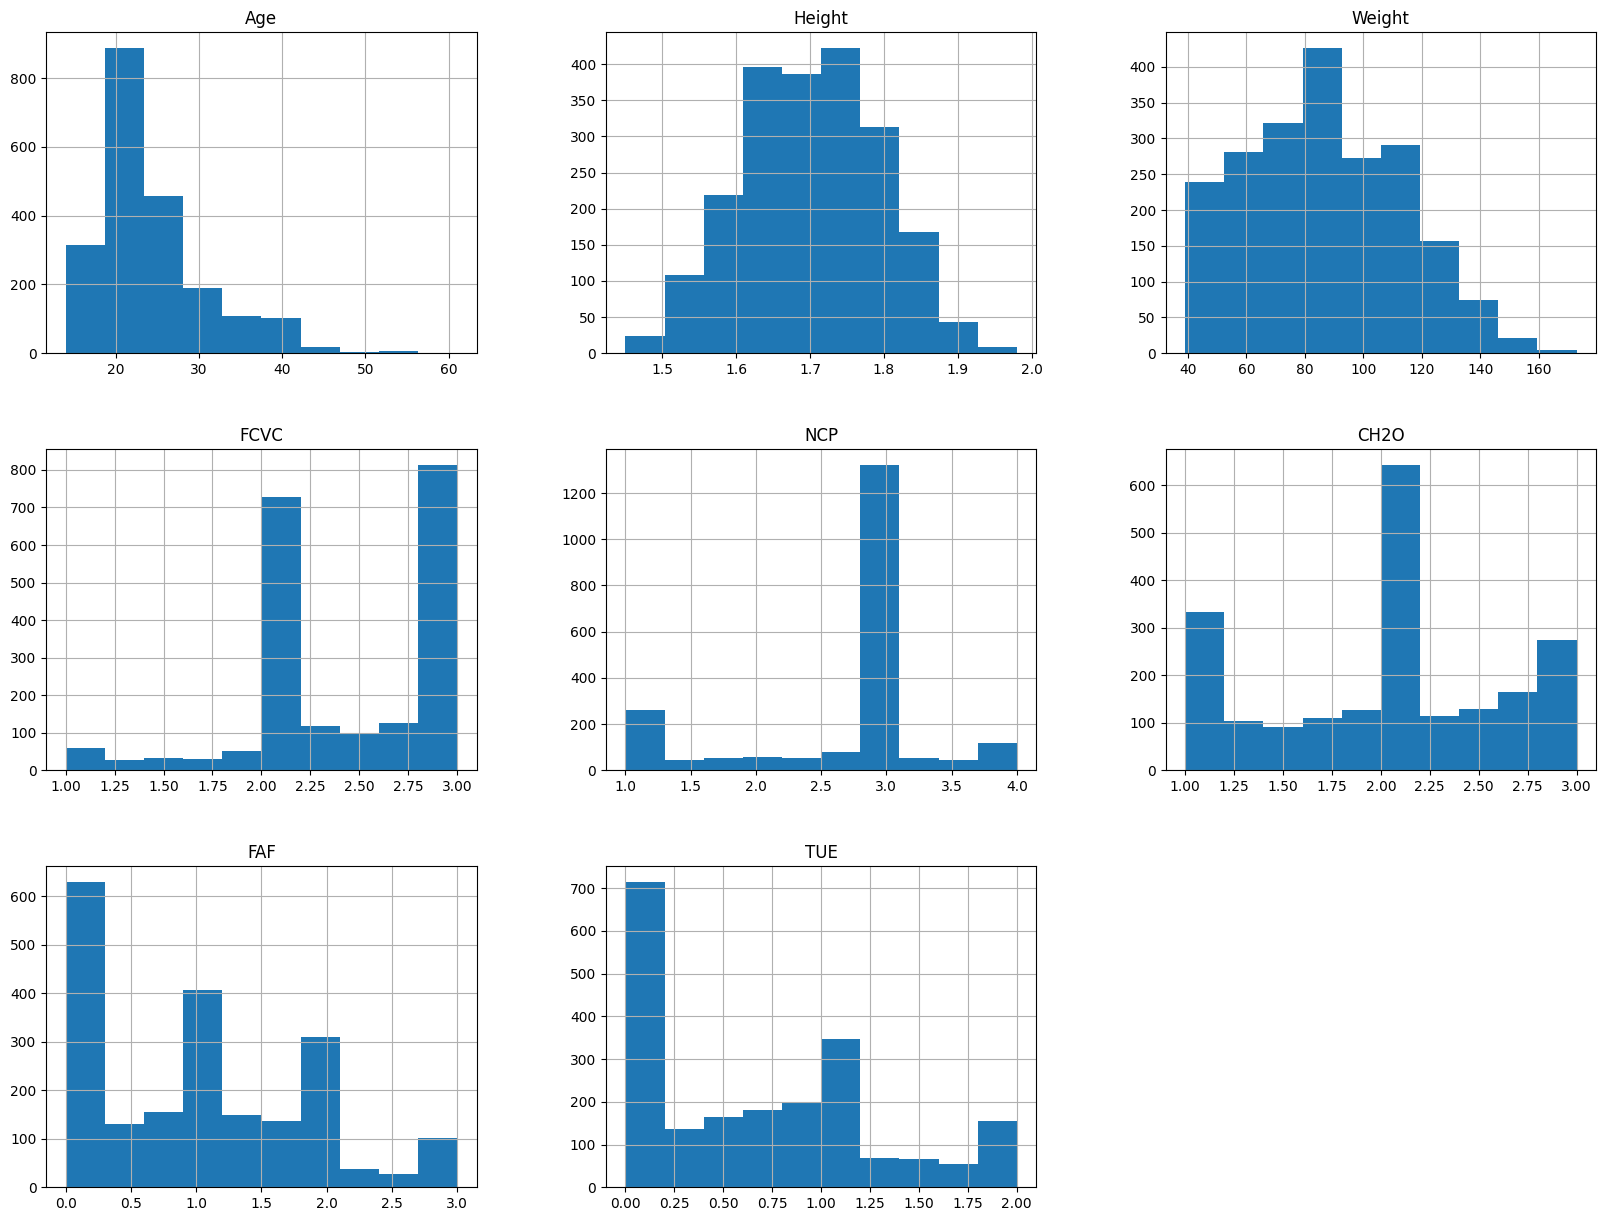

In [23]:
#3.9 Analisis grafico EDA
#dibujando histogramas para diferentes parametros
data.hist(bins=10,figsize=(20,15))

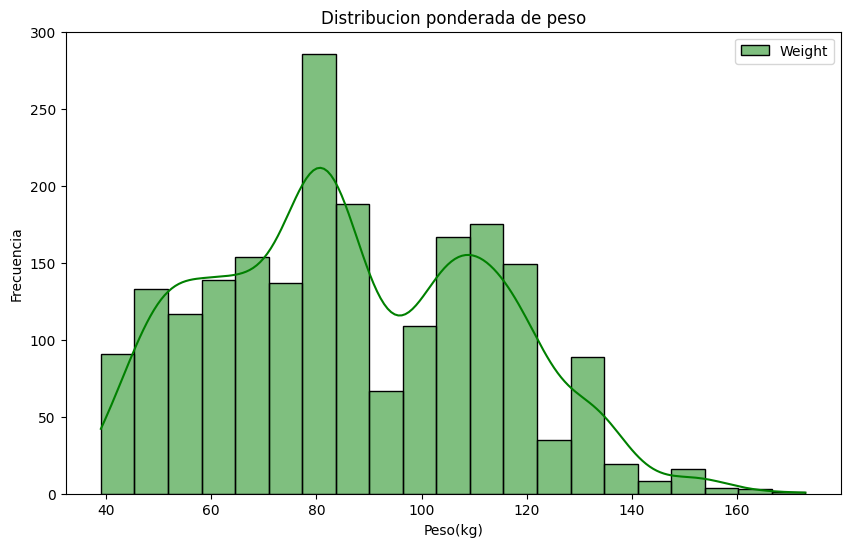

In [26]:
#Dibujar distribucion ponderada
plt.figure(figsize=(10,6))
sns.histplot(data=data,x="Weight",color="green",kde=True,label="Weight")
plt.title("Distribucion ponderada de peso")
plt.xlabel("Peso(kg)")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

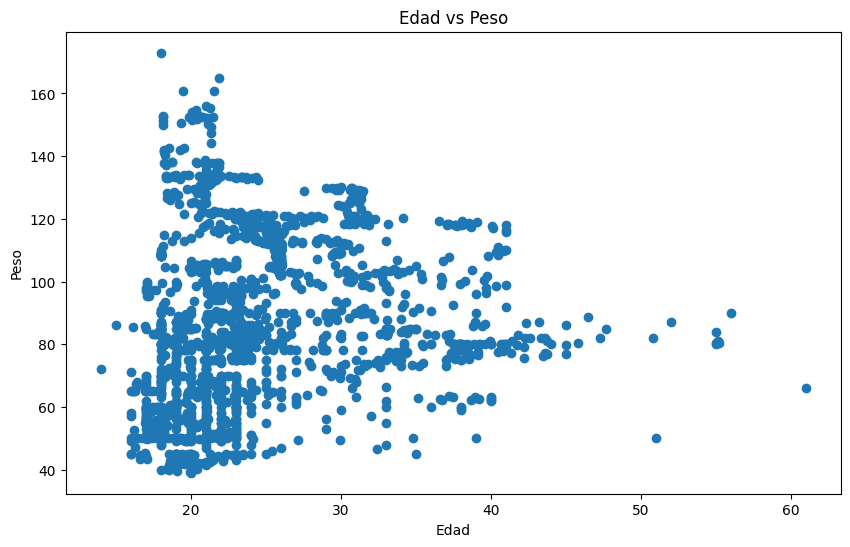

In [28]:
#Graficando scatter plot para evaluar edad vs peso
fig, ax=plt.subplots(figsize=(10,6))
ax.scatter(data["Age"],data["Weight"])
plt.title("Edad vs Peso")
ax.set_xlabel("Edad")
ax.set_ylabel("Peso")
plt.show()

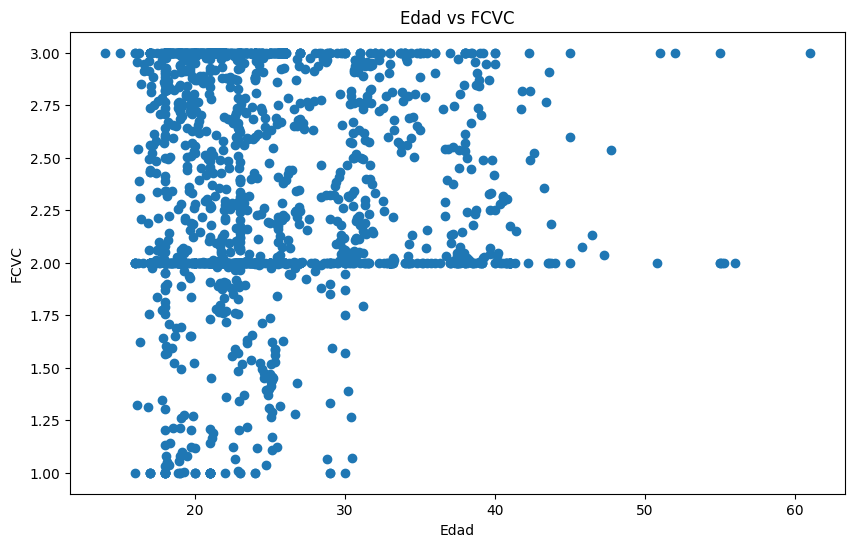

In [30]:
#Analisis de dispercion
fig, ax=plt.subplots(figsize=(10,6))
ax.scatter(data["Age"],data["FCVC"])
plt.title("Edad vs FCVC")
ax.set_xlabel("Edad")
ax.set_ylabel("FCVC")
plt.show()

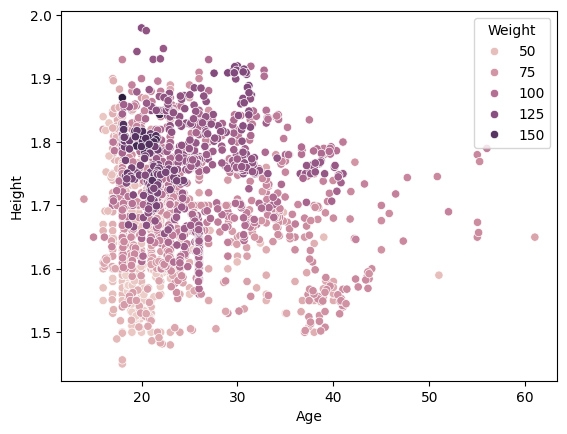

In [34]:
#Diagrama de dispercion entre edad vs estatura para diferentes pesos
scatter_P=sns.scatterplot(x="Age",y="Height",hue="Weight",data=data)

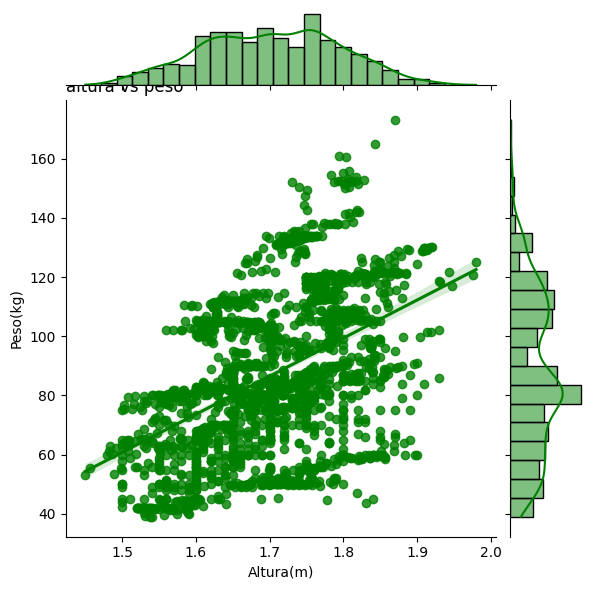

In [35]:
sns.jointplot	(x="Height",y="Weight",data=data,kind="reg",color="green")
plt.title("altura vs peso", loc="left")
plt.xlabel("Altura(m)")
plt.ylabel("Peso(kg)")
plt.show()


In [39]:
#Análisis entre Edad vs Promedio de peso para el top 15 de edades
top_15_ages=data.groupby("Age")["Weight"]. mean().nlargest(15)
top_15_ages

,Weight
Age,
19.47,160.935351
21.52,160.639405
20.33,154.618446
20.44,153.149491
21.06,152.094362
20.38,151.975864
20.09,151.417292
19.36,150.516480
21.32,149.291106


In [38]:
data["Age"]=data.Age.round(2)

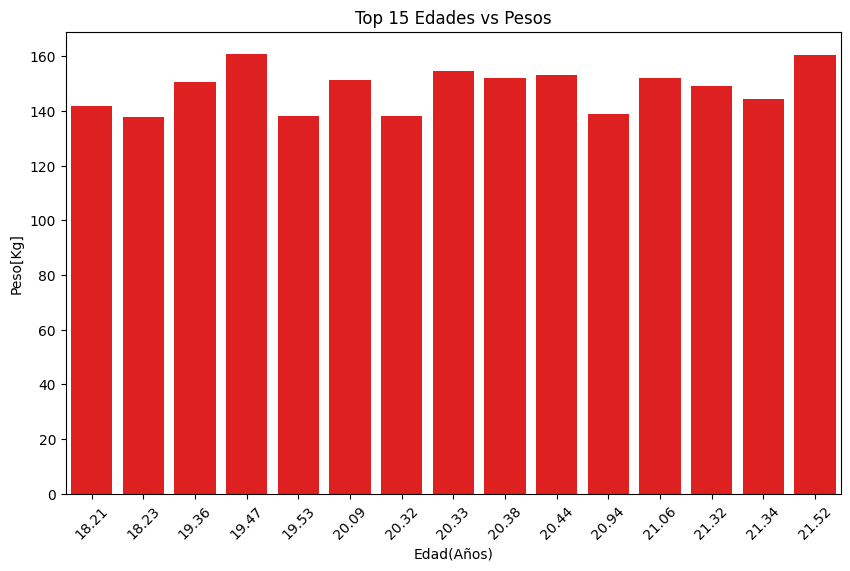

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_15_ages.index, y=top_15_ages.values, color="red")
plt.title("Top 15 Edades vs Pesos")
plt.xlabel("Edad(Años)")
plt.ylabel("Peso[Kg]")
plt.xticks(rotation=45)
plt.show()

In [43]:
data["CALC"]=data["CALC"].astype("category")
data["CALC"]

,CALC
0,no
1,Sometimes
2,Frequently
3,Frequently
4,Sometimes
...,...
2106,Sometimes
2107,Sometimes
2108,Sometimes
2109,Sometimes


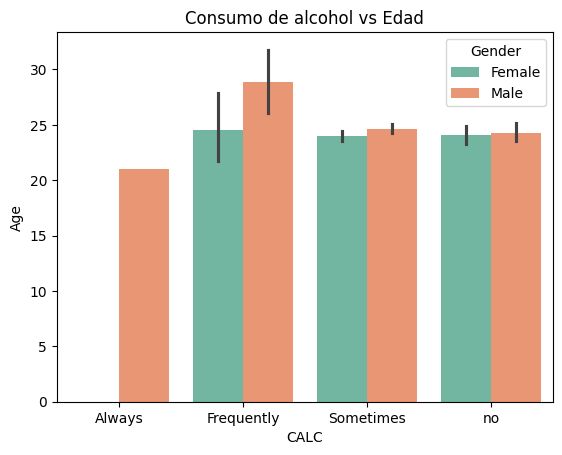

In [44]:
sns.barplot(x="CALC",y="Age",data=data,hue="Gender",palette="Set2")
plt.title("Consumo de alcohol vs Edad")
plt.show()

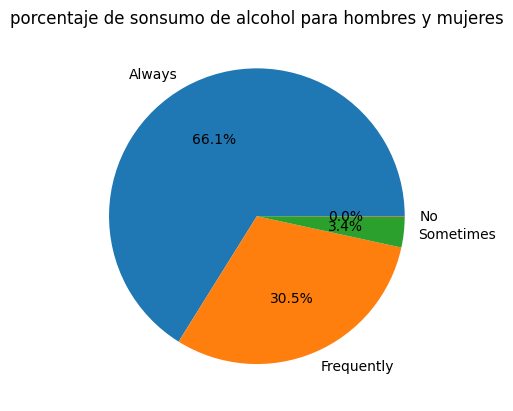

In [47]:
#Diagrama de torta para mostrar el % de consumo de alcohol
count= data["CALC"].value_counts()
labels=["Always", "Frequently", "Sometimes", "No"]
vals= count.values
plt.pie(vals,labels=labels,autopct="%1.1f%%")
plt.title("porcentaje de sonsumo de alcohol para hombres y mujeres")
plt.show()

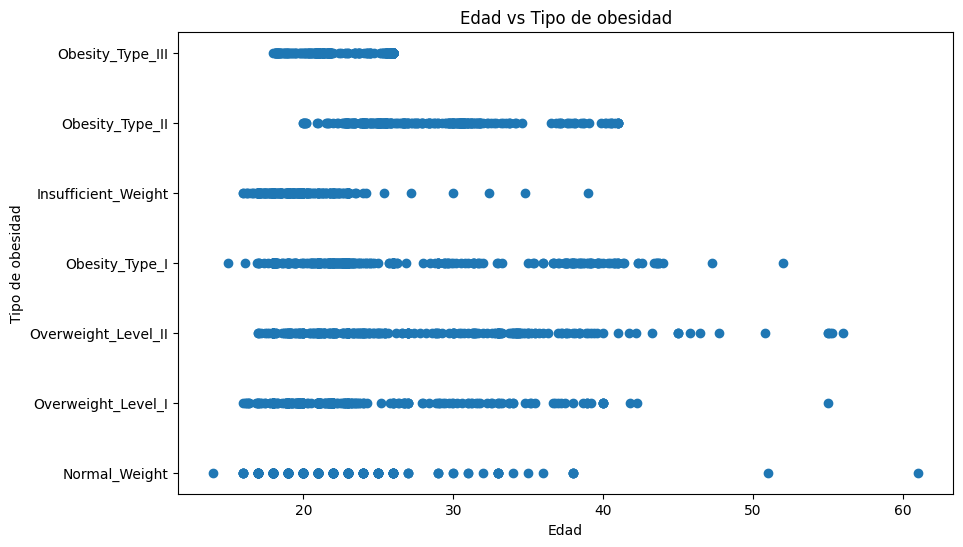

In [48]:
#Graficando edad vs tipo de obesidad usando el diagrama de dispercion
#Age vs NOBeyesdad
fig,ax=plt.subplots(figsize=(10,6))
ax.scatter(data["Age"],data["NObeyesdad"])
plt.title("Edad vs Tipo de obesidad")
ax.set_xlabel("Edad")
ax.set_ylabel("Tipo de obesidad")
plt.show()